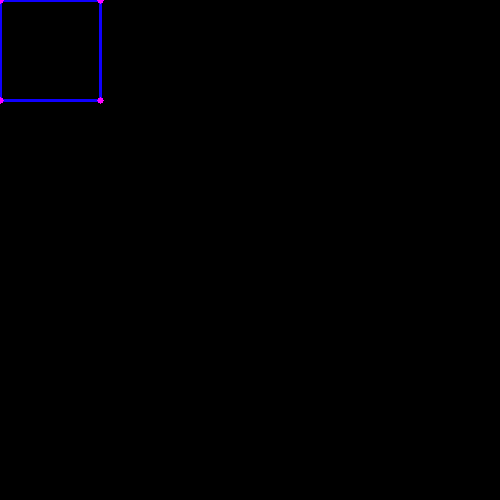

In [22]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

# Funciones
def draw(vertices, edges, im):
    """Dibuja objeto definido por vertices y bordes"""
    # Normalizar coordenadas homogeneas
    v_h = np.array([ v[:-2]/v[-1] for v in vertices])
    for e in edges:
        cv.line(im, tuple(v_h[e[0]].astype(int)), tuple(v_h[e[1]].astype(int)), (255,0,15), 2)
    for v in v_h:
        cv.circle(im, tuple(v.astype(int)), 3, (255,0,255),-1)

### ---------- DEFINIR FUNCIONES ---------- ###
def translate3d(vertex, dx, dy, dz):
    """Operación de traslación 3d"""

def project2D(vertex, f=35):
    """Aplica una transformacion de proyeccion pinhole"""


### ---------- DEFINIT GEOMETRIA  ---------- ###
# Cubo definido en su sistema coordenado
# Lista de vertices [[x, y, z,1], ...
# List de bordes que relacionan los indices de los vertices
# [(0,1), (1,2), ....
v = np.array([[0,100,100,1],[0,100,0,1],[100,100,0,1],[100,0,0,1],[100,0,100,1],[0,0,100,1],[0,0,0,1],[100,100,100,1]])
edges = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,0),(5,6),(1,6),(6,3),(7,4),(0,7),(7,2)]


### ---------- TRASLADAR CUBO A POSICION INDICADA ---------- ###



# Parametros camara
f = 200 # Distancia focal
# Tamano imagen
w = 500
h = 500

### ---------- PROYECTAR VERTICES ---------- ###
# Proyectar 3D -> 2D



###----------  TRASLADAR PROYECCION A CENTRO DE IMAGEN ---------- ###


# Dibujar y mostrar
im = np.zeros((h,w,3), np.uint8)
draw(v, edges, im)
cv2_imshow(im)

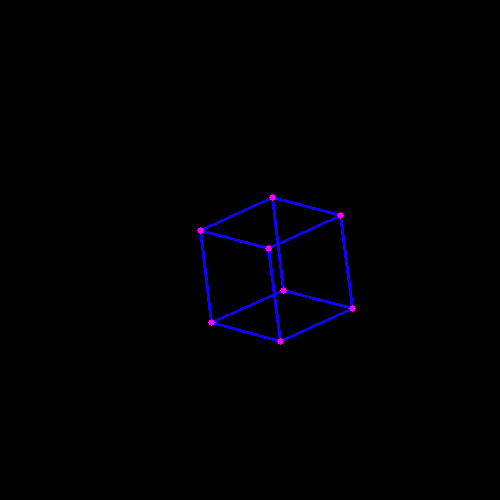

In [21]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

# Funciones
def draw(vertices, edges, im):
    """Dibuja objeto definido por vertices y bordes"""
    for e in edges:
        cv.line(im, tuple(vertices[e[0]][:2].astype(int)), tuple(vertices[e[1]][:2].astype(int)), (255, 0, 15), 2)
    for v in vertices:
        cv.circle(im, tuple(v[:2].astype(int)), 3, (255, 0, 255), -1)

### ---------- DEFINIR FUNCIONES ---------- ###
def translate3d(vertices, dx, dy, dz):
    """Operación de traslación 3d"""
    translation_matrix = np.array([[1, 0, 0, dx],
                                   [0, 1, 0, dy],
                                   [0, 0, 1, dz],
                                   [0, 0, 0, 1]])

    return np.dot(vertices, translation_matrix.T)

def rotate_x(angle):
    """Matriz de rotación en el eje X"""
    angle_rad = np.radians(angle)
    return np.array([[1, 0, 0, 0],
                     [0, np.cos(angle_rad), -np.sin(angle_rad), 0],
                     [0, np.sin(angle_rad), np.cos(angle_rad), 0],
                     [0, 0, 0, 1]])

def rotate_y(angle):
    """Matriz de rotación en el eje Y"""
    angle_rad = np.radians(angle)
    return np.array([[np.cos(angle_rad), 0, np.sin(angle_rad), 0],
                     [0, 1, 0, 0],
                     [-np.sin(angle_rad), 0, np.cos(angle_rad), 0],
                     [0, 0, 0, 1]])

def rotate_z(angle):
    """Matriz de rotación en el eje Z"""
    angle_rad = np.radians(angle)
    return np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0, 0],
                     [np.sin(angle_rad), np.cos(angle_rad), 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])

def project3D(vertices, d=500):
    """Aplica una proyección 3D"""
    projection_matrix = np.array([[1, 0, 0, 0],
                                  [0, 1, 0, 0],
                                  [0, 0, 1, 0],
                                  [0, 0, -1/d, 0]])

    return np.dot(vertices, projection_matrix.T)

### ---------- DEFINIT GEOMETRIA  ---------- ###
# Cubo definido en su sistema coordenado
v = np.array([[0, 100, 100, 1], [0, 100, 0, 1], [100, 100, 0, 1], [100, 0, 0, 1],
              [100, 0, 100, 1], [0, 0, 100, 1], [0, 0, 0, 1], [100, 100, 100, 1]])
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (5, 6), (1, 6), (6, 3), (7, 4), (0, 7), (7, 2)]

### ---------- ROTAR CUBO ---------- ###
# Rotar en el eje X
v = np.dot(v, rotate_x(angle=30).T)

# Rotar en el eje Y
v = np.dot(v, rotate_y(angle=45).T)

# Rotar en el eje Z
v = np.dot(v, rotate_z(angle=15).T)

v = translate3d(v, dx=200, dy=230, dz=230)

# Parametros de la cámara
d = 300  # Distancia de la cámara al plano de proyección

### ---------- PROYECTAR VERTICES EN 3D ---------- ###
v_projected = project3D(v, d=d)

# Dibujar y mostrar
im = np.zeros((500, 500, 3), np.uint8)
draw(v_projected, edges, im)
cv2_imshow(im)
